In [1]:
# example for plotting ERA5 data: 2m temperature in time_index zero

from piscis import nc_loader, plot_variable


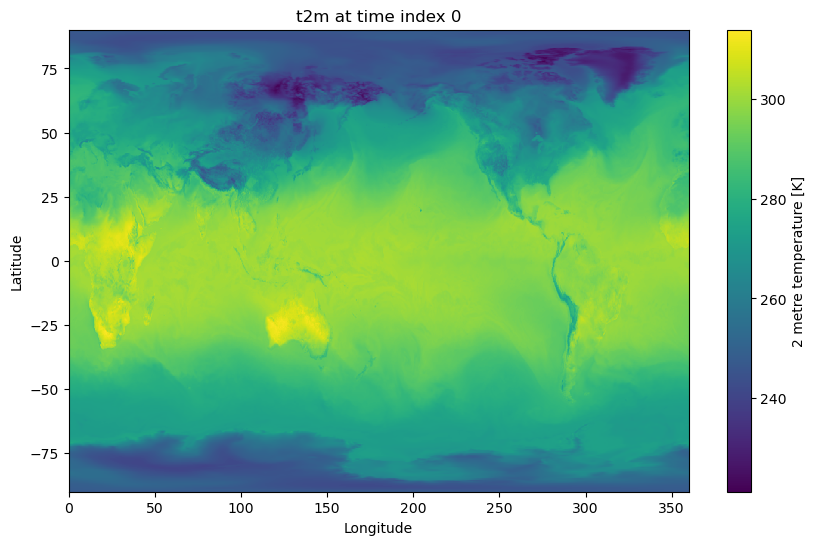

In [2]:
file_path = './data/raw/era5_2m_temperature.nc'
variable_name = 't2m'

plot_variable(file_path, variable_name, time_index=0)